<a href="https://colab.research.google.com/github/Ricardojnf33/Time_series/blob/main/Atividade_3_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install pmdarima
!pip install yfinance

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

import pmdarima as pm
from pmdarima.arima import KPSSTest
from pmdarima.arima import auto_arima
print(f"Using pmdarima {pm.__version__}")
# Using pmdarima 1.5.2

Using pmdarima 1.8.5


In [37]:
from pmdarima.datasets.stocks import load_msft

df = load_msft()
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [38]:
df.set_index('Date', inplace=True)

In [39]:
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [40]:
df.shape

(7983, 6)

In [41]:
df['Close'].describe()

count    7983.000000
mean       18.984698
std        16.424012
min         0.067200
25%         2.113300
50%        20.469000
75%        25.483500
max        84.560000
Name: Close, dtype: float64

In [42]:
plt.rcParams["figure.figsize"] = (20,10)

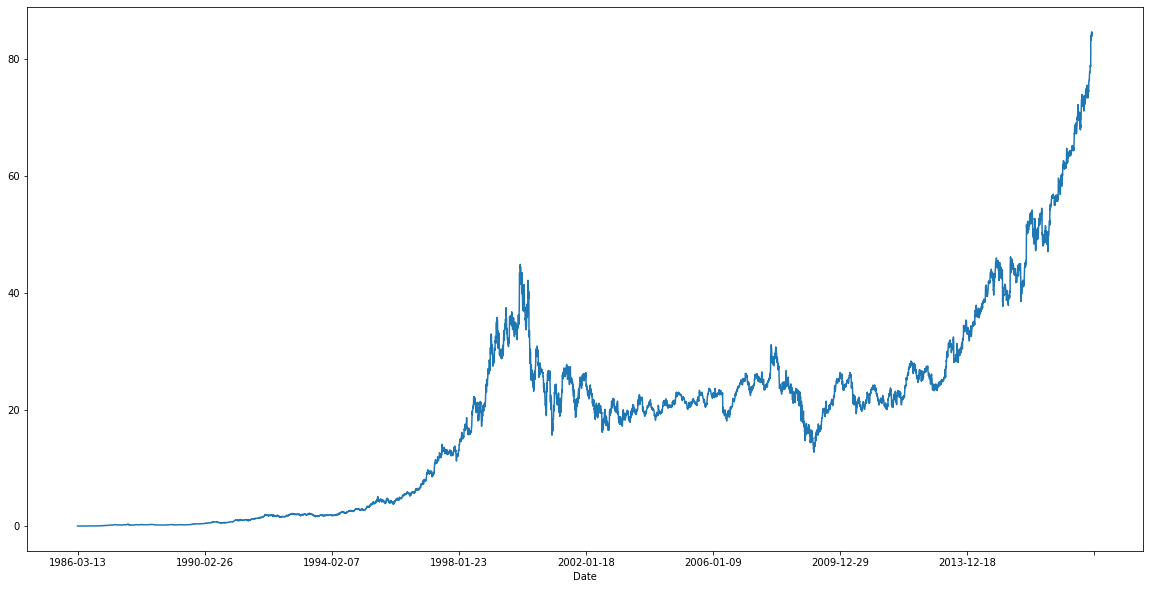

In [43]:
df['Close'].plot()

In [44]:
df['Close'].ffill(inplace=True)

In [45]:
example = df['Close']
ma_size = 2

for i in range(ma_size, len(example)):
  consider_val = example[i-ma_size:i]
  print(f'valores considerados: {consider_val}, MA {np.mean(consider_val)}')

A saída de streaming foi truncada nas últimas 5000 linhas.
valores considerados: Date
2012-11-23    24.375
2012-11-26    24.102
Name: Close, dtype: float64, MA 24.238500000000002
valores considerados: Date
2012-11-26    24.102
2012-11-27    23.830
Name: Close, dtype: float64, MA 23.966
valores considerados: Date
2012-11-27    23.830
2012-11-28    24.076
Name: Close, dtype: float64, MA 23.953
valores considerados: Date
2012-11-28    24.076
2012-11-29    23.716
Name: Close, dtype: float64, MA 23.896
valores considerados: Date
2012-11-29    23.716
2012-11-30    23.416
Name: Close, dtype: float64, MA 23.566000000000003
valores considerados: Date
2012-11-30    23.416
2012-12-03    23.260
Name: Close, dtype: float64, MA 23.338
valores considerados: Date
2012-12-03    23.260
2012-12-04    23.206
Name: Close, dtype: float64, MA 23.233
valores considerados: Date
2012-12-04    23.206
2012-12-05    23.470
Name: Close, dtype: float64, MA 23.338
valores considerados: Date
2012-12-05    23.470
2012-

In [46]:
def show_trend(consider_val, ma_size):
  df_serie = pd.DataFrame()
  df_serie['serie'] = df['Close'].values[ma_size:]
  df_serie['MA'] = consider_val.rolling(ma_size).mean().values[ma_size:]

  df_serie.plot()

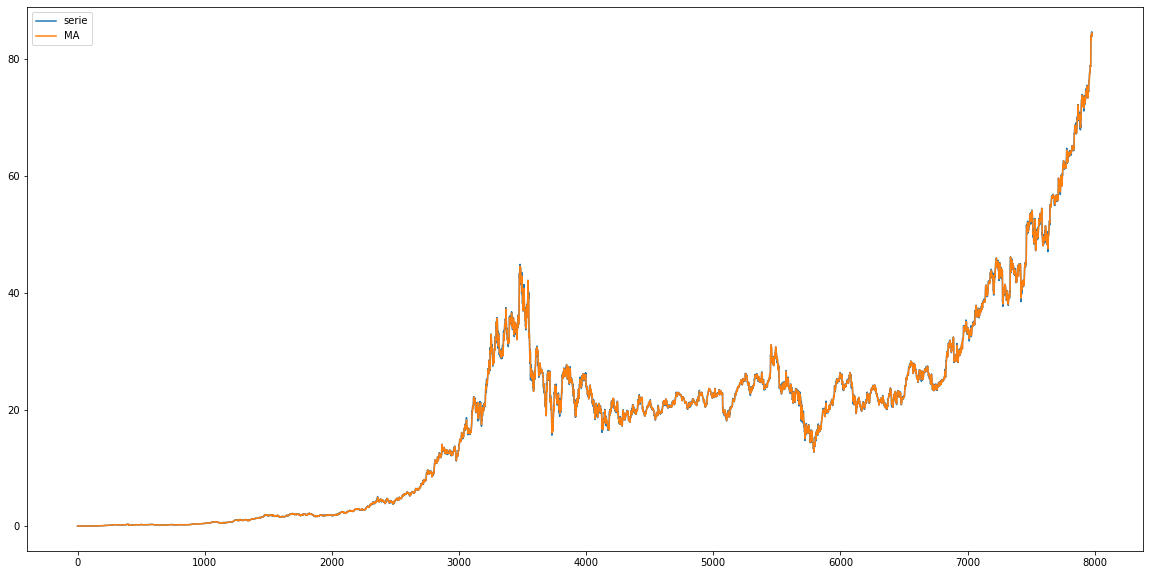

In [47]:
show_trend(df['Close'], ma_size)

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

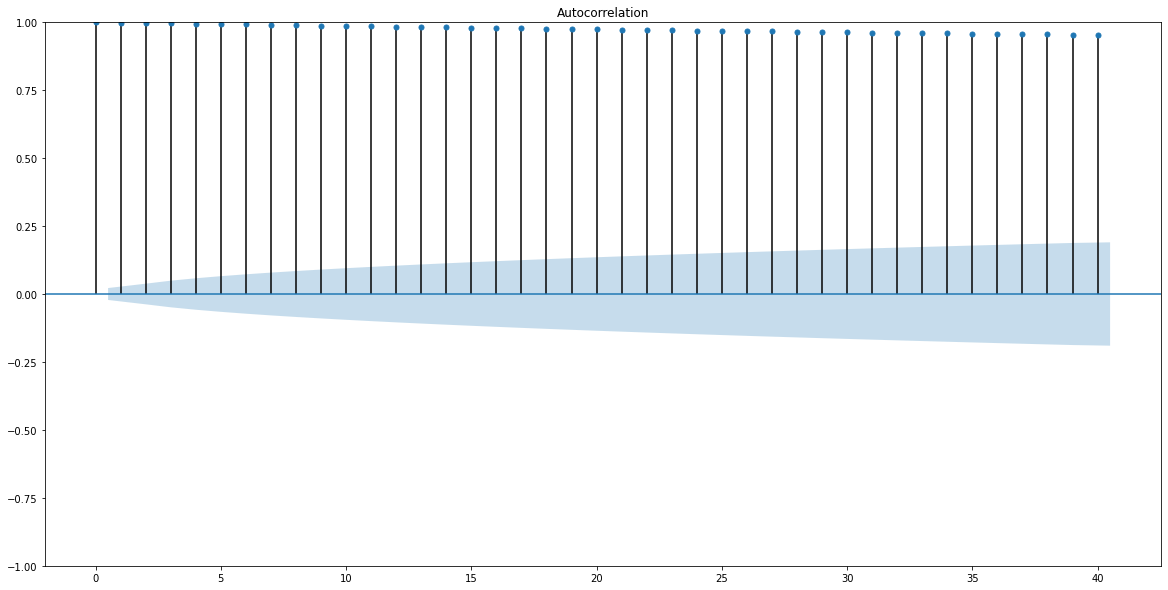

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


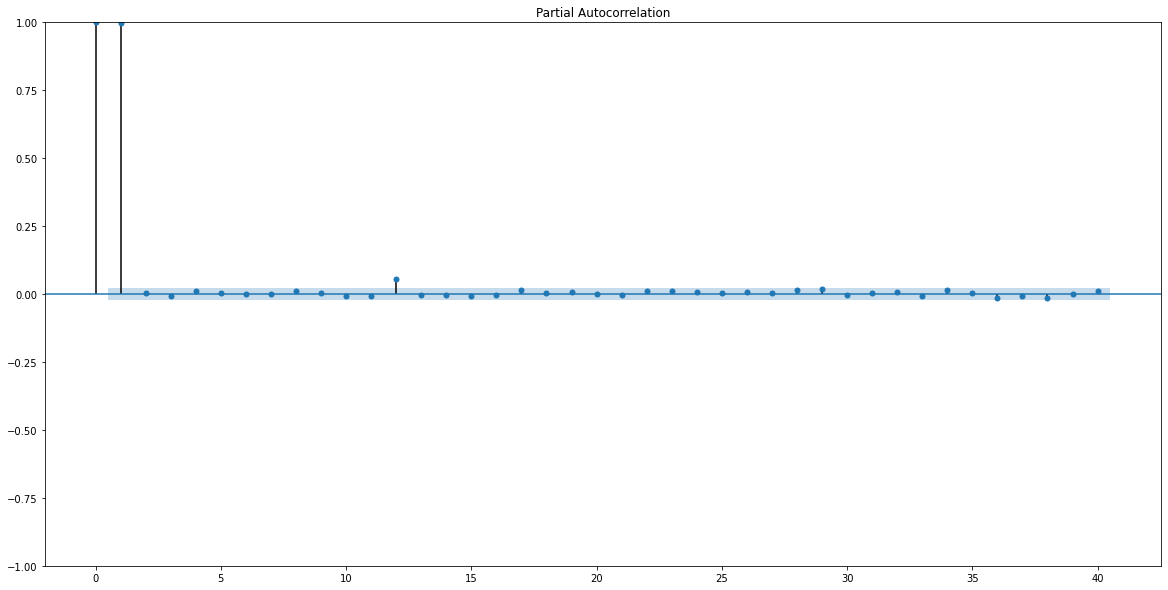

In [49]:
plot_acf(df['Close'])
plt.show()
plot_pacf(df['Close'])
plt.show()

In [50]:
df['Close'].describe()

count    7983.000000
mean       18.984698
std        16.424012
min         0.067200
25%         2.113300
50%        20.469000
75%        25.483500
max        84.560000
Name: Close, dtype: float64

In [51]:
kpss = KPSSTest()

kpss.should_diff(df['Close'].ffill())

(0.01, True)

In [52]:
df['Close'].isna().value_counts(normalize=True)

False    1.0
Name: Close, dtype: float64

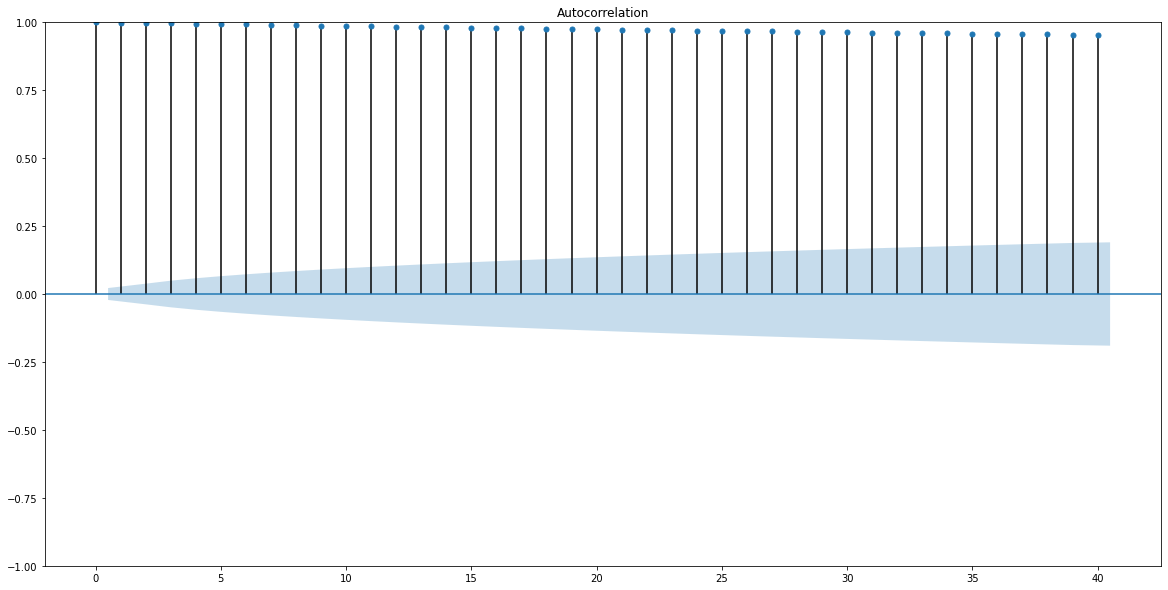

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


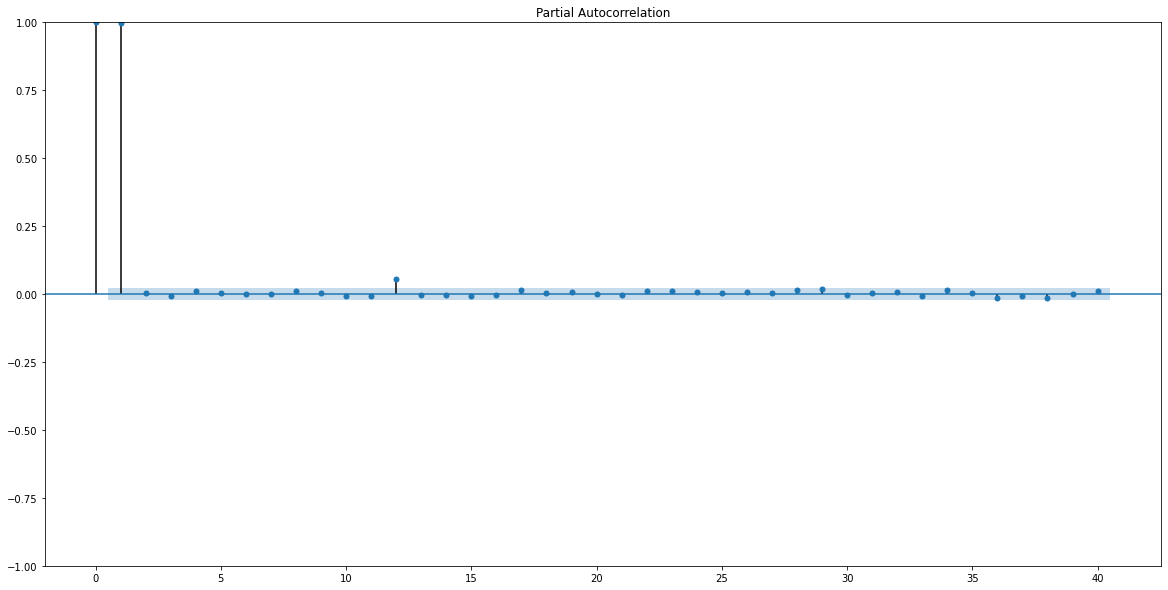

In [53]:
plot_acf(df['Close'])
plt.show()
plot_pacf(df['Close'])
plt.show()

In [54]:
def get_diff(dataset, interval=1):
  diff = list()

  for i in range(interval, dataset.shape[0]):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)

  return pd.Series(diff)

df_diff = get_diff(df['Close'], 1) 

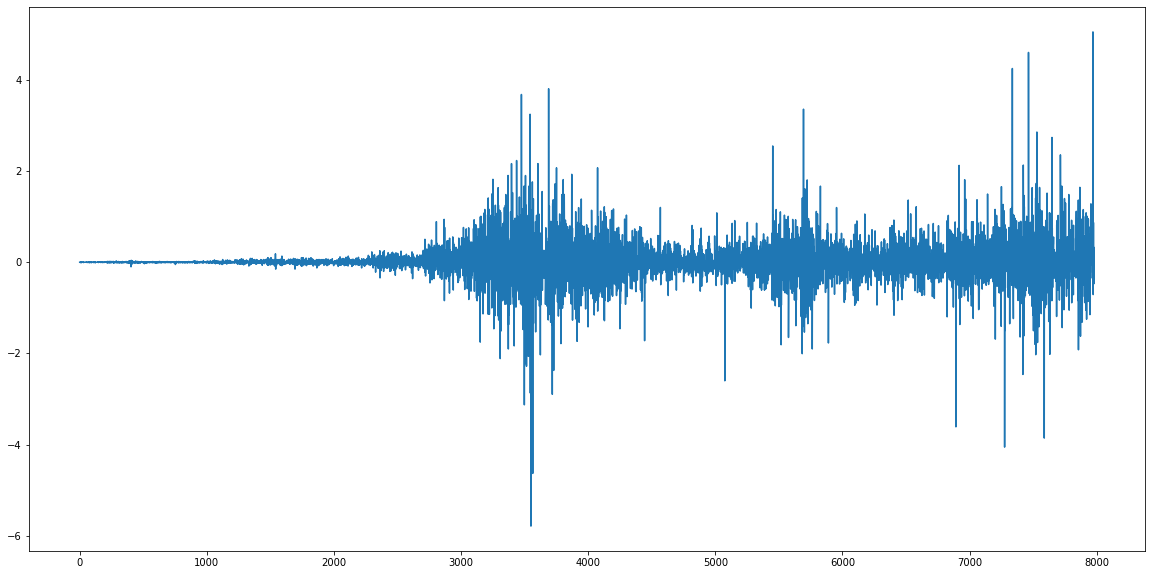

In [55]:
df_diff.plot()
plt.show()

In [56]:
kpss = KPSSTest()

kpss.should_diff(df_diff)

(0.03618638431819079, True)

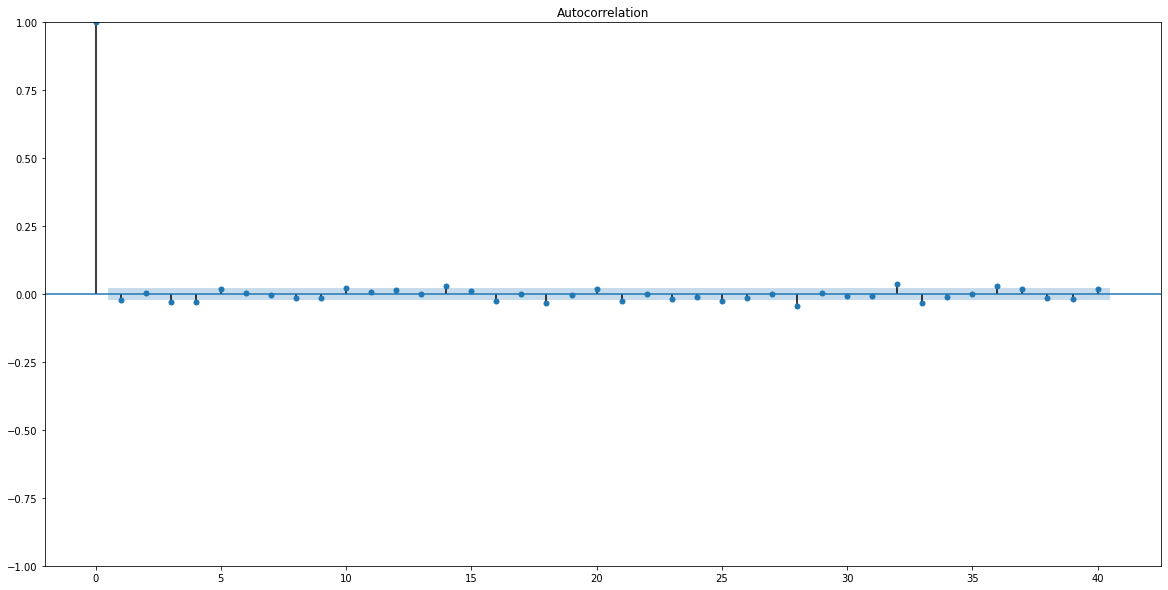

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


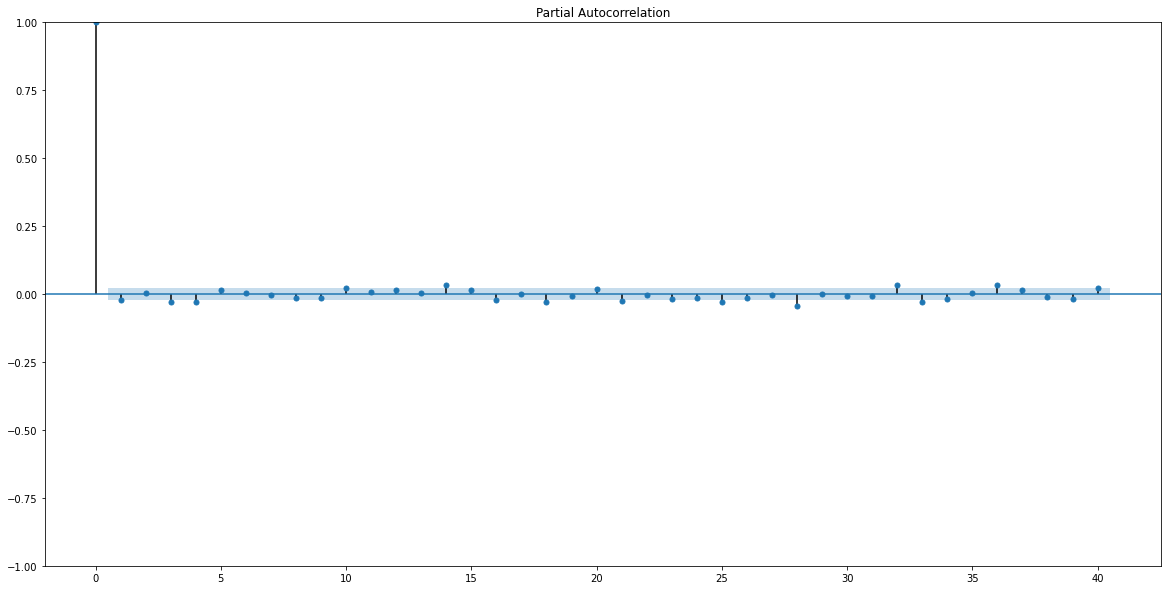

In [57]:
plot_acf(df_diff)
plt.show()
plot_pacf(df_diff)
plt.show()

In [58]:
df.head()

#df['Date'] = pd.to_datetime(df['Date'])

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [59]:
serie = df['Close']
serie.shape

(7983,)

In [60]:
serie = serie.apply(lambda x: 0 if pd.isna(x) else float(x))

# Implementação do modelo ARIMA

In [61]:
auto_arima(serie, #X=None,
           start_p=2, d=None, start_q=2,
           max_p=5, max_d=2, max_q=5, start_P=1, D=None,
           start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, trace=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.74 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=14907.055, Time=0.37 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=12487.766, Time=0.46 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.75 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=11639.961, Time=1.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=11164.528, Time=1.41 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=10731.421, Time=2.34 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=10482.093, Time=2.58 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=9454.290, Time=4.76 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=9551.488, Time=4.33 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=9333.520, Time=5.16 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=4.56 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=9462.984, Time=5.59 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=9529.500, Time=2.48 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=

ARIMA(maxiter=10, order=(5, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [62]:
model = auto_arima(serie, #X=None,
           start_p=2, d=None, start_q=2,
           max_p=5, max_d=2, max_q=5, start_P=1, D=None,
           start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=4, trace=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=inf, Time=2.74 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=14907.055, Time=0.34 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=12483.493, Time=0.79 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=9305.740, Time=1.41 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=inf, Time=0.88 sec
 ARIMA(0,2,1)(1,0,1)[4]             : AIC=9403.199, Time=1.57 sec
 ARIMA(0,2,1)(0,0,2)[4]             : AIC=9272.238, Time=2.03 sec
 ARIMA(0,2,1)(1,0,2)[4]             : AIC=9328.761, Time=2.21 sec
 ARIMA(0,2,0)(0,0,2)[4]             : AIC=14906.813, Time=1.24 sec
 ARIMA(1,2,1)(0,0,2)[4]             : AIC=9407.294, Time=2.33 sec
 ARIMA(0,2,2)(0,0,2)[4]             : AIC=9338.326, Time=2.77 sec
 ARIMA(1,2,0)(0,0,2)[4]             : AIC=12481.551, Time=1.49 sec
 ARIMA(1,2,2)(0,0,2)[4]             : AIC=9268.718, Time=2.87 sec
 ARIMA(1,2,2)(0,0,1)[4]             : AIC=inf, Time=1.99 sec
 ARIMA(1,2,2)(1,0,2)[4]             : AIC=92

# Aplicação do Predict nos proximos 10 dias

In [63]:
model.predict(10)

array([84.012286  , 84.12788411, 84.27872053, 84.42870576, 84.56328901,
       84.69353419, 84.83251019, 84.97314702, 85.10552432, 85.23997663])

In [64]:
serie.shape

(7983,)

## Separação de 10% para test

In [65]:
test_size = int(serie.shape[0] * 0.1)

In [34]:
train = serie.iloc[0:-test_size] # iloc do dado mais antigo, até o início de test_size = train
test = serie.iloc[-test_size:] # iloc do Início de test_size até o final = test 

In [66]:
model = auto_arima(train, #X=None,
           start_p=2, d=None, start_q=2,
           max_p=5, max_d=2, max_q=5, start_P=1, D=None,
           start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=4, trace=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=6753.333, Time=11.01 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=6757.471, Time=1.33 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=6744.262, Time=3.88 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=6744.294, Time=4.14 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=6757.199, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=6754.058, Time=1.90 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=6746.155, Time=3.51 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=6746.513, Time=2.86 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=6744.222, Time=1.99 sec
 ARIMA(1,1,0)(0,0,2)[4] intercept   : AIC=6746.220, Time=3.26 sec
 ARIMA(1,1,0)(1,0,2)[4] intercept   : AIC=6746.216, Time=4.71 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=6747.613, Time=1.60 sec
 ARIMA(2,1,0)(0,0,1)[4] intercept   : AIC=6745.845, Time=2.39 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=6744.264, Time=4.96 sec
 ARIMA(2,1,1)(0,0,1)[4] intercep

### Perseguir test, aplicar o predict e atualizar o modelo com o último valor predito 

In [67]:
test_prevs_h1 = []

for t in test:
    test_prevs_h1.append(model.predict(1)[0])
    model.update(t)

In [68]:
model.predict(1)[0]

43.21447461025298

## Test tqdm

In [70]:
pip install tqdm

In [71]:
from tqdm import tqdm

In [72]:
test_prevs_h1 = []

for t in tqdm(test):
    test_prevs_h1.append(model.predict(1)[0])
    model.update(t)

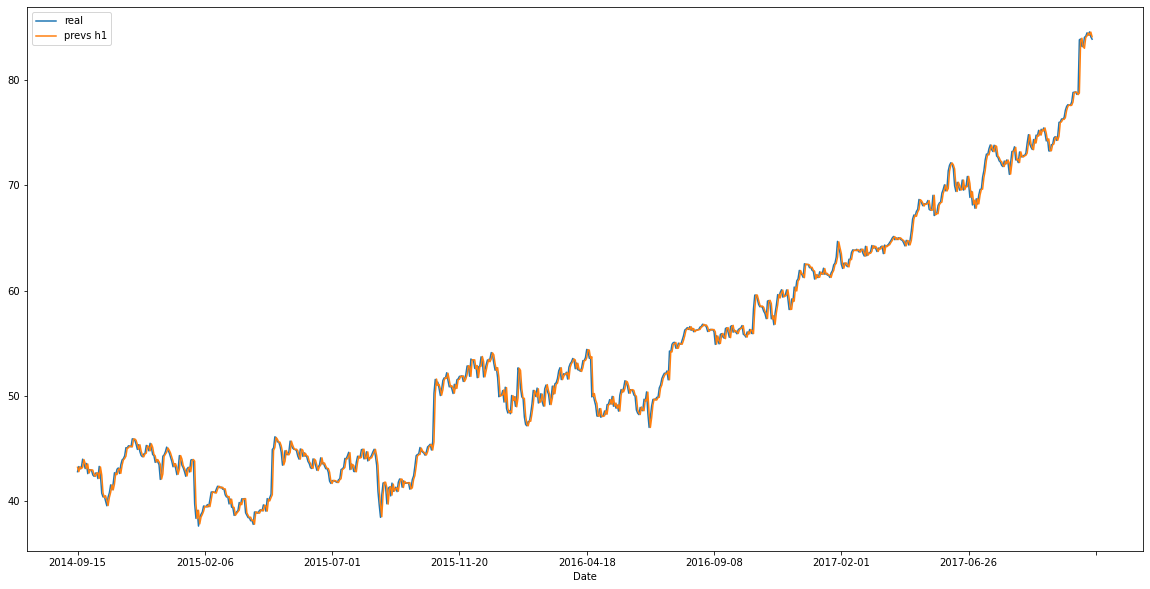

In [75]:
pd.DataFrame({'real': test, 'prevs h1': test_prevs_h1}).plot()

In [76]:
def mean_square_error(y_true, y_pred):
    y_true = np.asmatrix(y_true).reshape(-1)
    y_pred = np.asmatrix(y_pred).reshape(-1)

    return np.square(np.subtract(y_true, y_pred)).mean()

mean_square_error(test, test_prevs_h1)

0.5102380641882098

In [77]:
test_prevs_h300 = model.predict(test_size)

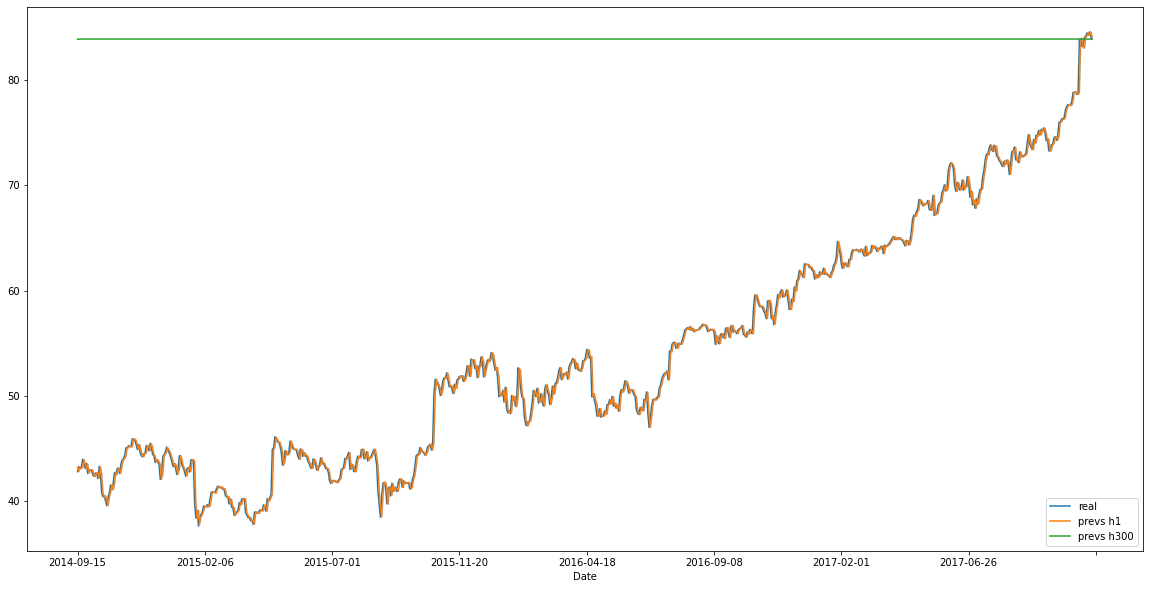

In [78]:
pd.DataFrame({'real': test, 'prevs h1': test_prevs_h1,  'prevs h300': test_prevs_h300}).plot()

In [79]:
mean_square_error(test, test_prevs_h300)

1018.7770502737725